<a href="https://colab.research.google.com/github/sky16k/MDS/blob/main/MDS07_HW_%D0%A9%D0%B5%D0%B4%D1%80%D0%B8%D0%BD%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание "Продвинутая оптимизация".

### Задание

При фиксированном `seed=42` поэкспериментируйте с параметрами алгоритма [differential_evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html): strategy, popsize, mutation.

Постройте графики количества итераций (`nit`) оптимизации [функции ackley](https://en.wikipedia.org/wiki/Ackley_function) от значения параметра. 

Подробнее о результате выдачи [тут](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html).

In [1]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]
s ='best1bin' 
p = 15
m = (0.5, 1)
result = differential_evolution(ackley, bounds, seed=42, strategy=s, popsize=p, mutation=m)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [3]:
### YOUR CODE HERE
def dif_ev_pop_mut_nfev(pop_, mut_):
    return differential_evolution(ackley, bounds, seed=42, strategy=s, popsize=pop_, mutation=mut_).nfev

In [80]:
def dif_ev_pop_mut(pop_, mut_):
    return differential_evolution(ackley, bounds, seed=42, strategy=s, popsize=pop_, mutation=mut_)

In [171]:
def dif_ev_pop_mut_str(pop_, mut_, str_):
    return differential_evolution(ackley, bounds, seed=42, strategy=str_, popsize=pop_, mutation=mut_)

In [103]:
p = 15
m = 0.11
dif = dif_ev_pop_mut(p,m)
dif
# dif.x == [0,0]
# dif.fun.round(5) == 0

     fun: 2.5799275570346087
     jac: array([-1.74082969e-05,  1.27897692e-05])
 message: 'Optimization terminated successfully.'
    nfev: 162
     nit: 4
 success: True
       x: array([9.52166170e-01, 2.24278389e-07])

In [153]:

# Данные
X = np.arange(0, 20, 1)
Y = np.arange(0, 2, 0.1)

Z = np.empty((len(Y),len(X)))
N = np.empty((len(Y),len(X)))

In [ ]:
for i,x in enumerate(X):
  for j,y in enumerate(Y):
    # print(i,j,x,y)
    dif = dif_ev_pop_mut(x,y)
    # фильтруем неудачные попытки
    if dif.fun.round(5) == 0:
        Z[j][i] = dif.nfev
        N[j][i] = dif.nit
        # print(Z[j][i], N[j][i])
    else :
        Z[j][i] = -1
        N[j][i] = -1

In [156]:
X, Y = np.meshgrid(X, Y)
# 

In [157]:
# Z

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


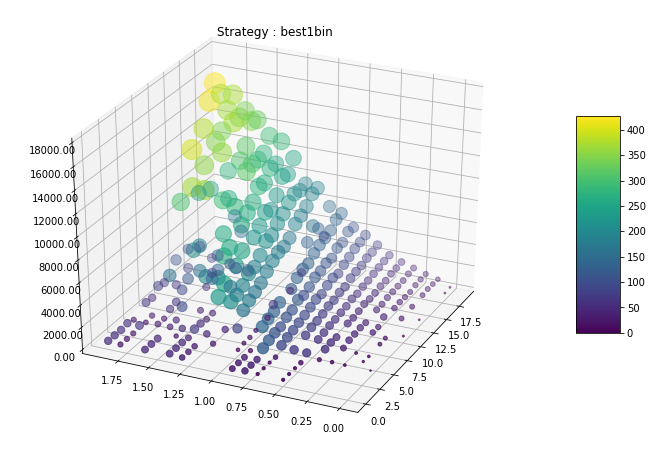

In [169]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d')

ax.set_title(f'Strategy : {s}')


# График результатов
scat = ax.scatter3D(X, Y, Z, c=N,s = N)

# Настройка оси z
ax.set_zlim(0, 18000)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Цветовая легенда
fig.colorbar(scat, shrink=0.5, aspect=5)


ax.azim = -155
ax.dist = 10
ax.elev = 30

    

plt.show()

best1bin


/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


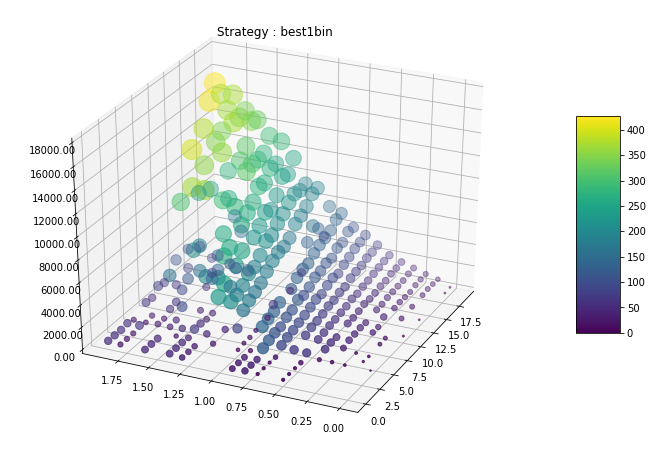

best1exp


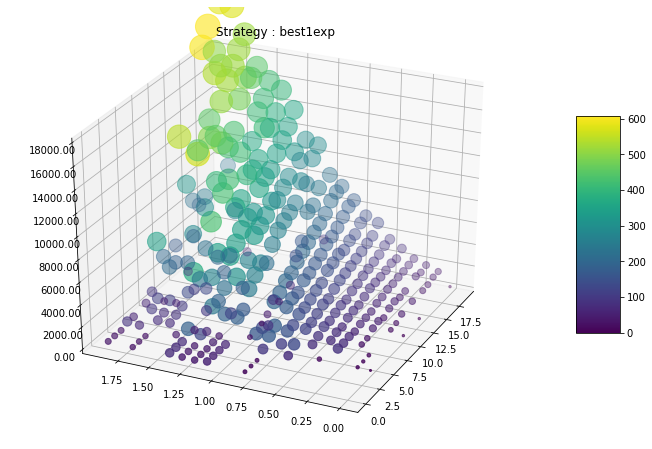

rand1exp


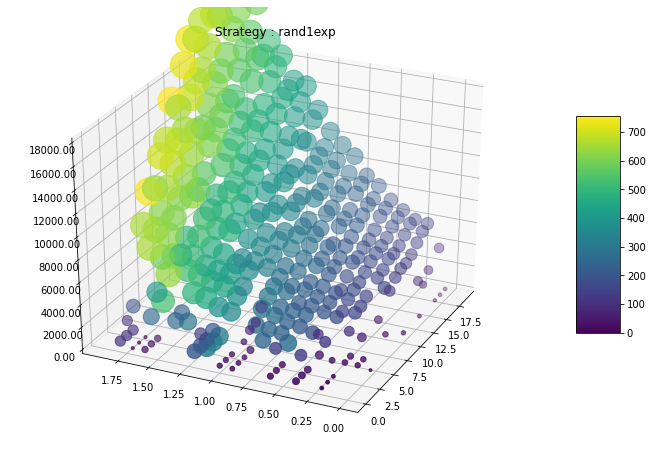

randtobest1exp


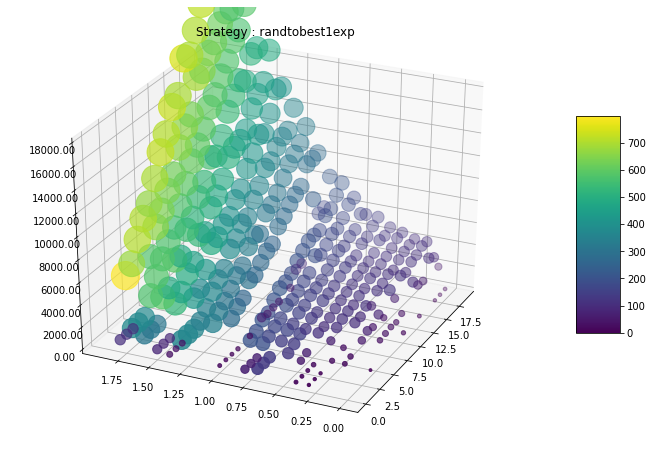

currenttobest1exp


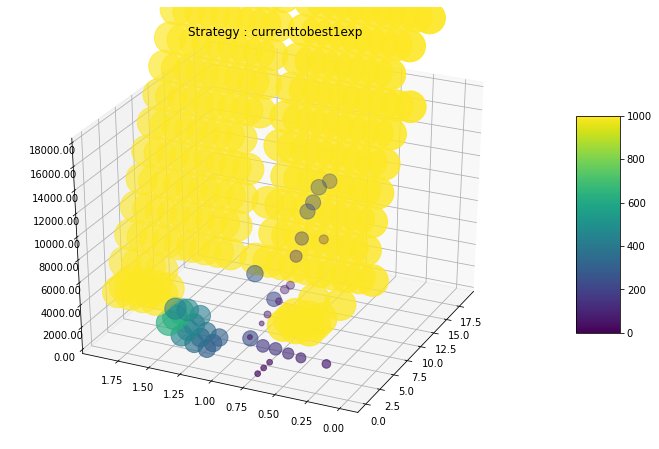

best2exp


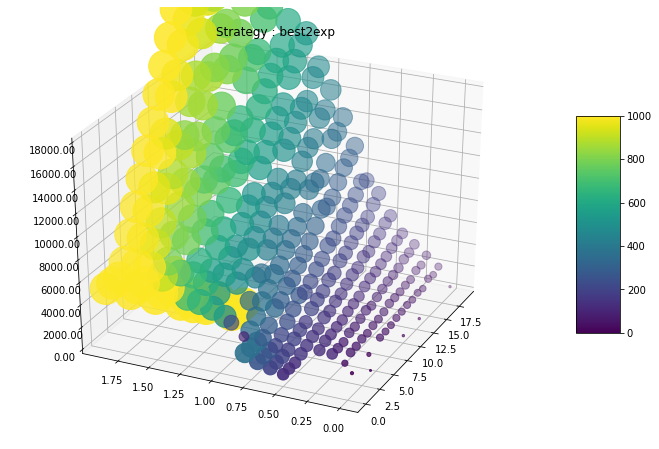

ValueError: ignored

In [172]:
X_ = np.arange(0, 20, 1)
Y_ = np.arange(0, 2, 0.1)
# 
Z = np.empty((len(Y),len(X)))
N = np.empty((len(Y),len(X)))
# 
X, Y = np.meshgrid(X_, Y_)
# 
for s in ['best1bin',
          'best1exp',
          'rand1exp',
          'randtobest1exp',
          'currenttobest1exp',
          'best2exp',
          'rand2exp',
          'randtobest1bin',
          'currenttobest1bin',
          'best2bin',
          'rand2bin',
          'rand1bin'
          ]:
    for i,x in enumerate(X_):
        for j,y in enumerate(Y_):
          # print(i,j,x,y)
          dif = dif_ev_pop_mut_str(x,y,s)
          # фильтруем неудачные попытки
          if dif.fun.round(5) == 0:
              Z[j][i] = dif.nfev
              N[j][i] = dif.nit
              # print(Z[j][i], N[j][i])
          else :
              Z[j][i] = -1
              N[j][i] = -1
    # 
    print(s)
    # 
    fig = plt.figure(figsize=(12, 8))
    ax = fig.gca(projection='3d')
    # График результатов
    scat = ax.scatter3D(X, Y, Z, c=N,s = N)
    # Настройка оси z
    ax.set_zlim(0, 18000)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    # Цветовая легенда
    fig.colorbar(scat, shrink=0.5, aspect=5)
    # 
    ax.azim = -155
    ax.dist = 10
    ax.elev = 30
    #
    ax.set_title(f'Strategy : {s}')
    #  
    plt.show()

### Дополнительное задание


Поэкспериментируйте с параметрами и оптимизацией через [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html):

In [ ]:
from scipy.optimize import minimize

x0 = [0,0]

result_m = minimize(ackley, x0,  method='Nelder-Mead')
result_m

 final_simplex: (array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.60675049e-05, -8.45336914e-06],
       [-1.40380859e-06, -3.11279297e-05]]), array([4.44089210e-16, 5.13604405e-05, 8.81584216e-05]))
           fun: 4.440892098500626e-16
       message: 'Optimization terminated successfully.'
          nfev: 17
           nit: 8
        status: 0
       success: True
             x: array([0., 0.])

In [ ]:
### YOUR CODE HERE

Вы также можете поэкспериментировать с [другими методами оптимизации](https://habr.com/ru/company/prequel/blog/568496/), но это не обязательно для зачета.
